In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [2]:
os.chdir('experiments/results')

In [19]:
def get_results(dirname):
    files = [file for file in os.listdir(dirname) if file.endswith('.json')]
    results = {}
    for i,file in enumerate(files):
        experiment_results = []
        with open(f'{dirname}/{file}', 'r') as f:
            experiment = json.load(f)
        description = experiment['config']['description'] 
        baseline = experiment['config']['baseline_avg_whole_network'] 
        if 'oracle' in description:
            continue 
        # print(experiment['results'])
        for round_dict in experiment['results']:
            round_num = round_dict['round']
            accs = [client_results['accuracy'] for client_results in round_dict['accuracies']]
            losses = [client_results['loss'] for client_results in round_dict['losses']]
            avg_acc = np.mean(accs)
            avg_loss = np.mean(losses)
            experiment_results.append((round_num, avg_acc, avg_loss))
        results[i] = {'description': description, 'results': experiment_results, 'baseline': baseline}
    return results

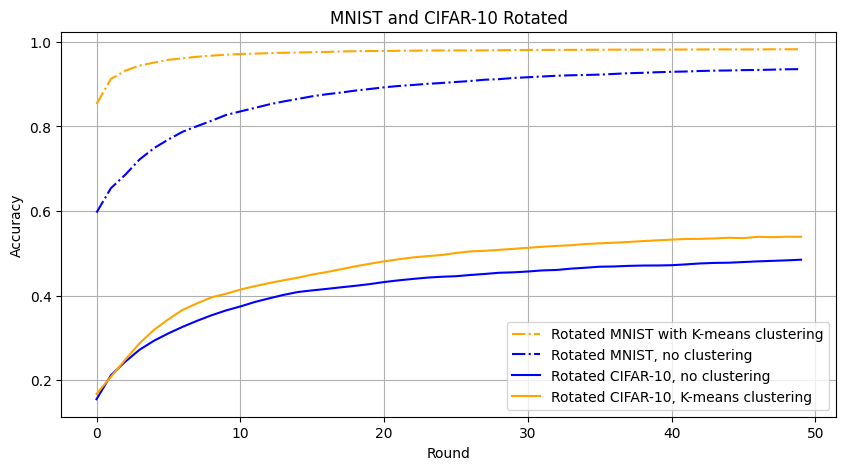

In [35]:
dirname = './mnist_rotated'
mnist_results = get_results(dirname)
dirname = './cifar10_rotated'
cifar_results = get_results(dirname)

# linestyle is - - for mnist, - for cifar
# color is orange for baseline_average
plt.figure(figsize=(10, 5))
for i in mnist_results:
    description = mnist_results[i]['description']
    baseline = mnist_results[i]['baseline']
    experiment_results = mnist_results[i]['results']
    rounds = [r[0] for r in experiment_results]
    accs = [r[1] for r in experiment_results]
    plt.plot(rounds, accs, label=description, linestyle='-.', color = 'blue' if baseline else 'orange')
for i in cifar_results:
    description = cifar_results[i]['description']
    experiment_results = cifar_results[i]['results']
    baseline = cifar_results[i]['baseline']
    rounds = [r[0] for r in experiment_results]
    accs = [r[1] for r in experiment_results]
    plt.plot(rounds, accs, label=description, linestyle='-', color = 'blue' if baseline else 'orange')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('MNIST and CIFAR-10 Rotated')
plt.legend()
plt.grid()
plt.show()


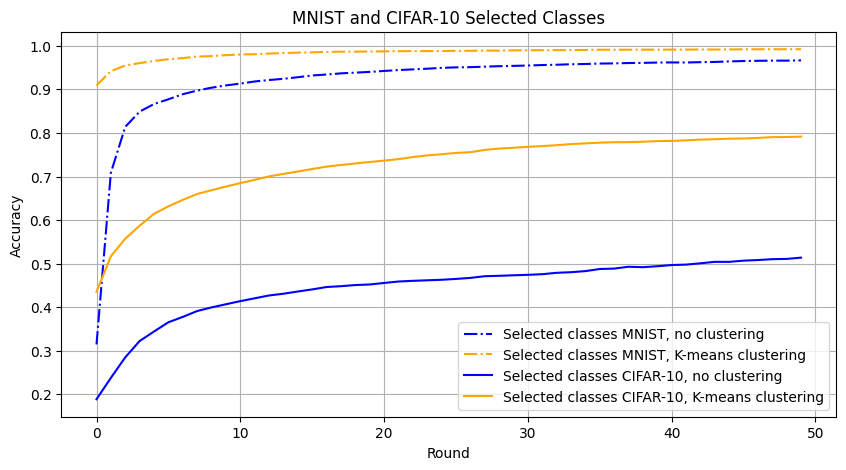

In [36]:
dirname = './mnist_selected_classes'
mnist_results = get_results(dirname)
dirname = './cifar10_selected_classes'
cifar_results = get_results(dirname)

# linestyle is - - for mnist, - for cifar
# color is orange for baseline_average
plt.figure(figsize=(10, 5))
for i in mnist_results:
    description = mnist_results[i]['description']
    baseline = mnist_results[i]['baseline']
    experiment_results = mnist_results[i]['results']
    rounds = [r[0] for r in experiment_results]
    accs = [r[1] for r in experiment_results]
    plt.plot(rounds, accs, label=description, linestyle='-.', color = 'blue' if baseline else 'orange')
for i in cifar_results:
    description = cifar_results[i]['description']
    experiment_results = cifar_results[i]['results']
    baseline = cifar_results[i]['baseline']
    rounds = [r[0] for r in experiment_results]
    accs = [r[1] for r in experiment_results]
    plt.plot(rounds, accs, label=description, linestyle='-', color = 'blue' if baseline else 'orange')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('MNIST and CIFAR-10 Selected Classes')
plt.legend()
plt.grid()
plt.show()
